In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
# Proses ekstraksi data
df = pd.read_csv('train.csv', sep = ';')

# Tampilkan hasilnya
display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**1. Data Cleansing**

**A. Handle missing values**

In [ ]:
# melihat jmlah missing value pada setiap kolom dari Dataset Bank Marketing Target
missing_values_count = df.isnull().sum()

# menampilkan hasil dari perhitungan missing Value
print("Jumlah missing values per kolom:")
print(missing_values_count)

Jumlah missing values per kolom:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Bisa dilihat bahwa Dataset Dari Bank Marketing Target **tidak memiliki Missing Value** Sehingga tidak diperlukan dilakukan Hanling Missing Value.

**B. Handle duplicated data**

In [ ]:
# Melakukan Cheking untuk mendeteksi data duplikat
df.duplicated().sum()

0

Dari Dataset yang di chek, **tidak memiliki Duplikasi Data**.

**C. Handle outliers**

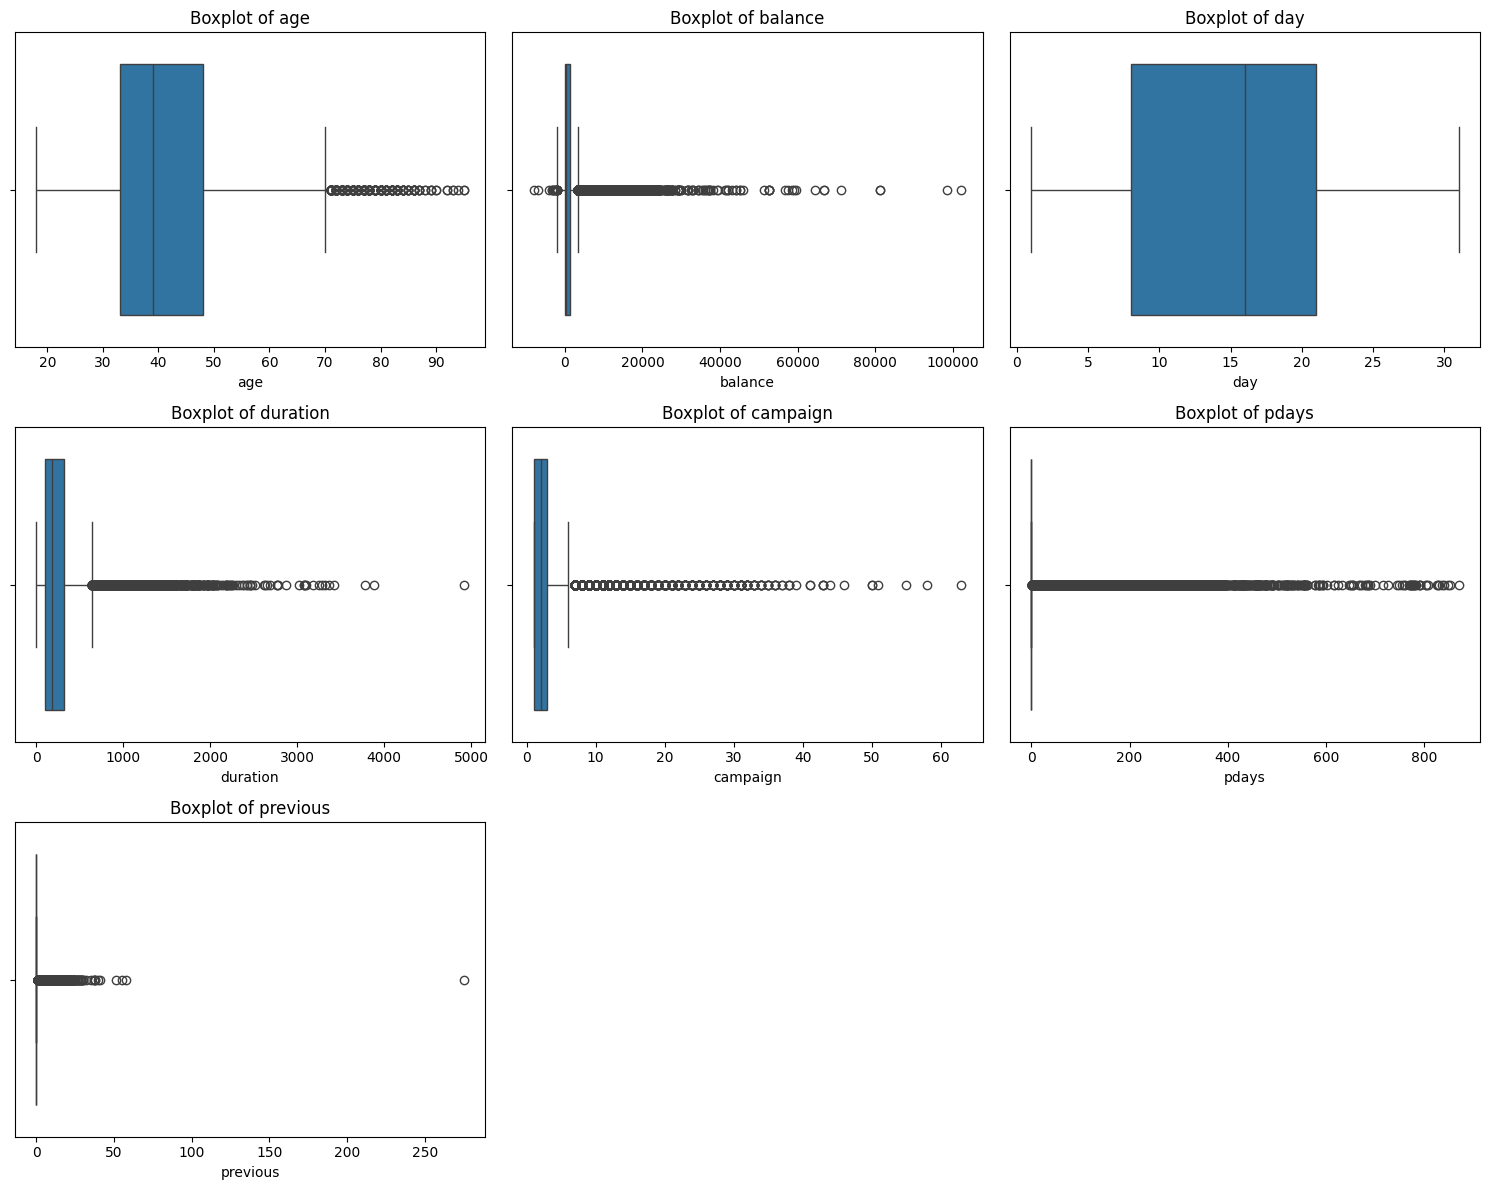

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mendapatkan kolom numerik
numeric_columns = df.select_dtypes(include=['int64']).columns

# Menentukan ukuran figure dan jumlah subplots
num_plots = len(numeric_columns)
ncols = 3  # Jumlah kolom per baris
nrows = (num_plots // ncols) + (num_plots % ncols > 0)  # Jumlah baris

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))

# Loop melalui setiap kolom dan membuat boxplot
for i, column in enumerate(numeric_columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot of {column}")

# Menghapus subplot kosong jika jumlah kolom tidak sesuai dengan ncols
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flat[j])

# Mengatur layout agar tidak overlap
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Deteksi outliers pada kolom balance
outliers_balance = detect_outliers_iqr(df, 'balance')
print(f'Number of outliers in balance: {outliers_balance.shape[0]}')

Number of outliers in balance: 4729


In [ ]:
display(outliers_balance)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45164,35,services,married,tertiary,no,4655,no,no,cellular,9,nov,111,2,-1,0,unknown,no
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,no
45185,60,services,married,tertiary,no,4256,yes,no,cellular,16,nov,200,1,92,4,success,yes
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes


In [3]:
# Fungsi untuk menghapus outliers menggunakan IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

# Menghapus outliers pada kolom balance
df_no_outliers = remove_outliers_iqr(df, 'balance')
print(f'Shape of dataset after removing outliers: {df_no_outliers.shape}')

Shape of dataset after removing outliers: (40482, 17)


In [4]:
display(df_no_outliers)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**D. Feature transformation**

In [5]:
# Menghapus nilai 0 atau nilai minus pada kolom 'balance'
df_no_outliers_clean = df_no_outliers[df_no_outliers['balance'] > 0].copy()  # Buat salinan eksplisit setelah penyaringan

# Log transformasi kolom 'balance'
df_no_outliers_clean['balance_log'] = np.log1p(df_no_outliers_clean['balance'])

# Tampilkan beberapa baris dari dataset yang telah dibersihkan dan ditransformasi
display(df_no_outliers_clean[['balance', 'balance_log']])

,balance,balance_log
0,2143,7.670429
1,29,3.401197
2,2,1.098612
3,1506,7.317876
4,1,0.693147
...,...,...
45205,505,6.226537
45206,825,6.716595
45207,1729,7.455877
45209,668,6.505784


In [6]:
# Mendefinisikan mapping dari nama bulan ke nomor bulan
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Menambahkan kolom baru yang berisi nomor bulan berdasarkan kolom 'month'
df_no_outliers_clean['month_num'] = df_no_outliers_clean['month'].map(month_mapping)

# Menampilkan hasil DataFrame
display(df_no_outliers_clean)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_log,month_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,7.670429,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,3.401197,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1.098612,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,7.317876,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.693147,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,6.226537,11
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,6.716595,11
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,7.455877,11
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,6.505784,11


In [7]:
# Menghapus kolom 'month'
df_no_outliers_clean = df_no_outliers_clean.drop(columns=['month'])

# Tampilkan beberapa baris dari dataset yang telah diubah
from IPython.display import display
display(df_no_outliers_clean.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,balance_log,month_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,261,1,-1,0,unknown,no,7.670429,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,151,1,-1,0,unknown,no,3.401197,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,76,1,-1,0,unknown,no,1.098612,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,92,1,-1,0,unknown,no,7.317876,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,198,1,-1,0,unknown,no,0.693147,5


**E. Feature encoding**

In [13]:
# Mengubah nilai 'y' menjadi nilai biner (1 untuk 'yes' dan 0 untuk 'no')
df_no_outliers_clean['y'] = df['y'].map({'no': 0, 'yes': 1})

In [15]:
# Menampilkan hasil feature encoding
display(df_no_outliers_clean)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,balance_log,month_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,261,1,-1,0,unknown,0,7.670429,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,151,1,-1,0,unknown,0,3.401197,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,76,1,-1,0,unknown,0,1.098612,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,92,1,-1,0,unknown,0,7.317876,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,198,1,-1,0,unknown,0,0.693147,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,386,2,-1,0,unknown,1,6.226537,11
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,977,3,-1,0,unknown,1,6.716595,11
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,456,2,-1,0,unknown,1,7.455877,11
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,508,4,-1,0,unknown,0,6.505784,11


**F. Handle class imbalance**


In [55]:
df_no_outliers_clean['y'].value_counts()

,count
y,
0,29198
1,4021


kemudian hasil campain didominasi dengan tidak diketahui,
dengan kebanyakan pelangan tidak melanjutkan deposito sekitar 29198 dari 33219 (Setelah dilakukan Penanganan Outliers, Feature transformation ) dimana hal ini berarti  **87.8%** belum berdeposito berjangka panjang.**

**y**: Respons target, menunjukkan apakah nasabah telah berlangganan deposito berjangka (biner: "yes", "no").

In [35]:
# Cek nama kolom di DataFrame
print(df_no_outliers_clean.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y', 'balance_log', 'month_num'],
      dtype='object')


In [47]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
# Pisahkan fitur dan target
X = df_no_outliers_clean.drop('y', axis=1)  # Fitur
y = df_no_outliers_clean['y']  # Target

In [49]:
# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
# Identifikasi fitur kategorikal dan numerik
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(exclude=['object']).columns

In [51]:
# Pipeline untuk preprocessing fitur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [52]:
# Terapkan preprocessing pada data latih dan uji
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [53]:
# Terapkan SMOTE pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [56]:
# Tampilkan jumlah sampel untuk memverifikasi
print("Jumlah data y sebelum SMOTE:")
print(y_train.value_counts())

print("\nJumlah data y setelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Jumlah data y sebelum SMOTE:
y
0    23358
1     3217
Name: count, dtype: int64

Jumlah data y setelah SMOTE:
y
0    23358
1    23358
Name: count, dtype: int64


# **Feature Engineering**

**1. Features Selection**

In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Buat model untuk seleksi fitur
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Seleksi fitur menggunakan model
selector = SelectFromModel(model, threshold="mean", prefit=True)
X_train_selected = selector.transform(X_train_resampled)

# Mendapatkan fitur yang terpilih
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist()
+ numerical_features.tolist()
selected_features = [feature_names[i] for i in range(len(feature_names)) if selector.get_support()[i]]

print("Fitur yang terpilih:")
print(selected_features)

Fitur yang terpilih:
['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_services', 'job_student', 'poutcome_success', 'poutcome_unknown', 'day', 'campaign', 'balance_log']


**2. Feature Extraction**

In [58]:
#Creating new feature 'balance_per_duration'
df_no_outliers_clean['balance_per_duration'] = df_no_outliers_clean['balance'] / df_no_outliers_clean['duration']

#Creating new feature 'campaign_duration_ratio'
df_no_outliers_clean['campaign_duration_ratio'] = df_no_outliers_clean['campaign'] / df_no_outliers_clean['duration']
display(df_no_outliers_clean[['balance_per_duration', 'campaign_duration_ratio']].head())

,balance_per_duration,campaign_duration_ratio
0,8.210728,0.003831
1,0.192053,0.006623
2,0.026316,0.013158
3,16.369565,0.010870
4,0.005051,0.005051


 **Balance_per_duration** = rasio antara saldo bank (balance) dengan durasi panggilan (duration). Ini memberikan gambaran tentang saldo rata-rata yang dipegang nasabah per satuan waktu durasi panggilan.

1. Korelasi Potensial: Nasabah dengan saldo yang lebih tinggi mungkin lebih cenderung untuk terlibat dalam percakapan yang lebih panjang dan informatif, yang dapat mempengaruhi keputusan mereka terhadap penawaran yang diberikan selama panggilan.
2. Insight Ekonomi: Rasio ini dapat mencerminkan stabilitas ekonomi nasabah dan kesiapan mereka untuk menerima produk atau layanan baru. Nasabah dengan saldo tinggi per unit waktu mungkin lebih berniat untuk mengambil tindakan yang disarankan selama panggilan.

**Campaign_Duration_Ratio** = rasio antara jumlah kampanye yang dilakukan terhadap nasabah (campaign) dengan durasi panggilan (duration). Ini mengukur efisiensi kampanye terhadap waktu yang dihabiskan untuk panggilan.
1. Efisiensi Kampanye: Rasio ini dapat menunjukkan seberapa efektif kampanye yang dilakukan terhadap nasabah. Kampanye yang lebih sedikit tetapi dengan durasi panggilan yang panjang mungkin lebih efektif dibandingkan dengan banyak kampanye dengan panggilan yang singkat.
2.Keterlibatan Nasabah: Fitur ini bisa menjadi indikator seberapa cepat nasabah merespon terhadap kampanye. Rasio yang rendah mungkin menunjukkan nasabah yang tidak mudah terpengaruh oleh kampanye yang cepat atau singkat.


**Fitur Tambahan**

Berikut tiga ide fitur tambahan yang mungkin akan membantu performansi model:

1. average_balance_per_contact: Rata-rata balance per kontak pelanggan.
2. previous_campaign_success_rate: Rasio keberhasilan kampanye sebelumnya.
3. age_group: Kategorisasi umur menjadi beberapa kelompok umur.
